# **Palmers Penguins Extended**

## Objectives

* This is an example dataset from Kaggle on which I want to perform a clustering ML example

## Inputs

* It is the Palmers Penguins Extended dataset from kaggle https://www.kaggle.com/datasets/samybaladram/palmers-penguin-dataset-extended/data 

## Outputs

* I will output a cleaned CSV file, as well as some basic visualisations in a jupyter notebook
* I also hope to make a streamlit page



---

# Change working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\tb975\\OneDrive\\Documents\\vs_code_projects\\Penguin-ML-Classification\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\tb975\\OneDrive\\Documents\\vs_code_projects\\Penguin-ML-Classification'

# Data cleaning

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [5]:
df = pd.read_csv("data/palmerpenguins_extended.csv")
df.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,diet,life_stage,health_metrics,year
0,Adelie,Biscoe,53.4,17.8,219.0,5687.0,female,fish,adult,overweight,2021
1,Adelie,Biscoe,49.3,18.1,245.0,6811.0,female,fish,adult,overweight,2021
2,Adelie,Biscoe,55.7,16.6,226.0,5388.0,female,fish,adult,overweight,2021
3,Adelie,Biscoe,38.0,15.6,221.0,6262.0,female,fish,adult,overweight,2021
4,Adelie,Biscoe,60.7,17.9,177.0,4811.0,female,fish,juvenile,overweight,2021
5,Adelie,Biscoe,35.7,16.8,194.0,5266.0,female,fish,juvenile,overweight,2021
6,Adelie,Biscoe,61.0,20.8,211.0,5961.0,female,fish,adult,overweight,2021
7,Adelie,Biscoe,66.1,20.8,246.0,6653.0,male,fish,adult,overweight,2021
8,Adelie,Biscoe,61.4,19.9,270.0,6722.0,male,fish,adult,overweight,2021
9,Adelie,Biscoe,54.9,22.3,230.0,6494.0,male,fish,adult,overweight,2021


---

In [6]:
print(df.shape)

print(df.info())

(3430, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3430 entries, 0 to 3429
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            3430 non-null   object 
 1   island             3430 non-null   object 
 2   bill_length_mm     3430 non-null   float64
 3   bill_depth_mm      3430 non-null   float64
 4   flipper_length_mm  3430 non-null   float64
 5   body_mass_g        3430 non-null   float64
 6   sex                3430 non-null   object 
 7   diet               3430 non-null   object 
 8   life_stage         3430 non-null   object 
 9   health_metrics     3430 non-null   object 
 10  year               3430 non-null   int64  
dtypes: float64(4), int64(1), object(6)
memory usage: 294.9+ KB
None


In [7]:
cols = df.columns

for col in cols:
    if df[col].dtype == 'object':
        df[col] = df[col].astype('category')
    
print(df.info())

#same thing but in one line from ChatGPT
#df = df.astype({col: "category" for col in df.select_dtypes('object').columns})

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3430 entries, 0 to 3429
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            3430 non-null   category
 1   island             3430 non-null   category
 2   bill_length_mm     3430 non-null   float64 
 3   bill_depth_mm      3430 non-null   float64 
 4   flipper_length_mm  3430 non-null   float64 
 5   body_mass_g        3430 non-null   float64 
 6   sex                3430 non-null   category
 7   diet               3430 non-null   category
 8   life_stage         3430 non-null   category
 9   health_metrics     3430 non-null   category
 10  year               3430 non-null   int64   
dtypes: category(6), float64(4), int64(1)
memory usage: 155.0 KB
None


In [10]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,3430.000000,3430.000000,3430.000000,3430.000000,3430.000000
mean,38.529825,18.447143,207.028863,4834.710496,2023.348397
std,13.175171,2.774428,28.944765,1311.091310,1.313797
min,13.600000,9.100000,140.000000,2477.000000,2021.000000
25%,28.900000,16.600000,185.000000,3843.500000,2022.000000
50%,34.500000,18.400000,203.000000,4633.500000,2024.000000
75%,46.600000,20.300000,226.000000,5622.000000,2024.000000
max,88.200000,27.900000,308.000000,10549.000000,2025.000000


In [12]:
df.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
diet                 0
life_stage           0
health_metrics       0
year                 0
dtype: int64

In [14]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3425    False
3426    False
3427    False
3428    False
3429    False
Length: 3430, dtype: bool

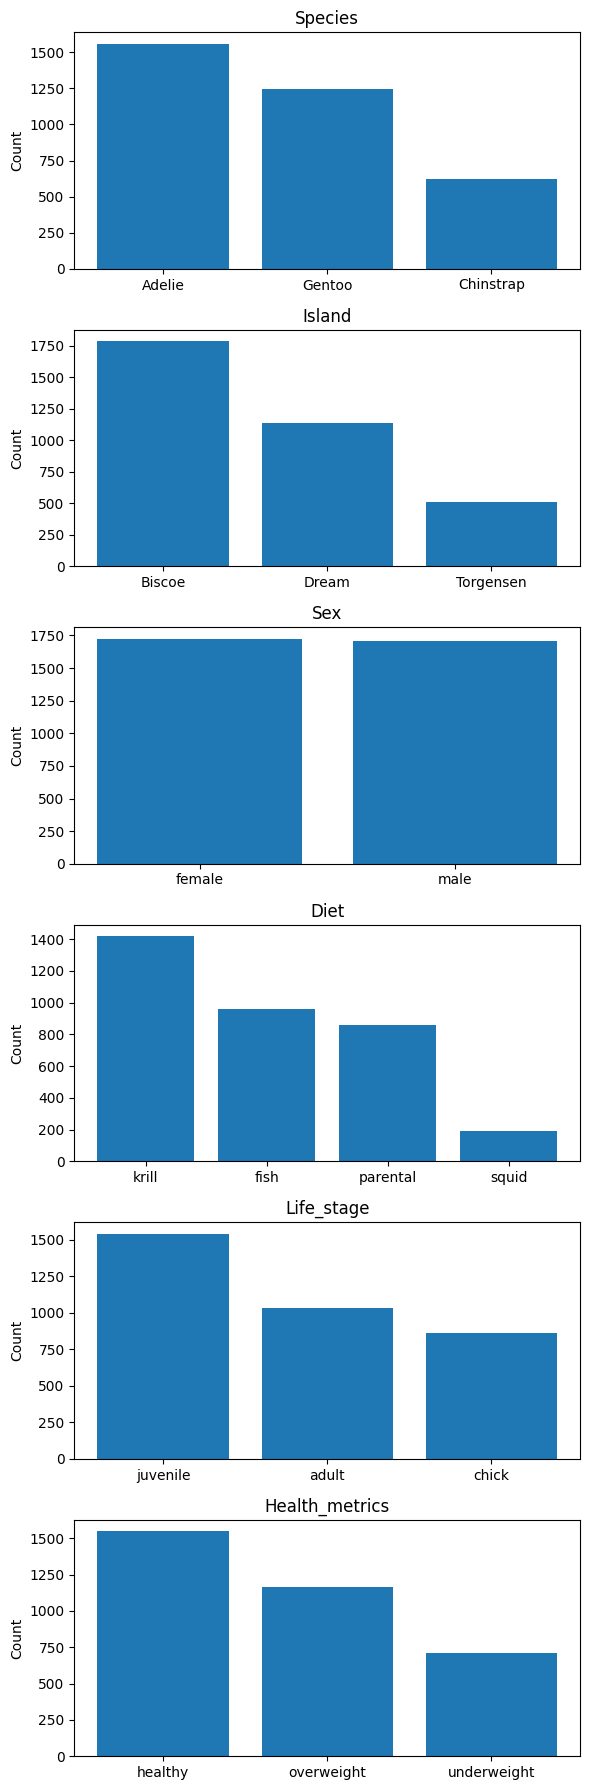

In [47]:
cat_cols = df.select_dtypes('category').columns
fig, ax = plt.subplots(len(cat_cols), 1, figsize=(6, 3* len(cat_cols)))

# If only one categorical column, axes is not a list → fix by wrapping in a list (copied from gpt)
if len(cat_cols) == 1:
    ax = [ax]

for i, col in enumerate(cat_cols):
    count =df[col].value_counts()
    ax[i].bar(x=count.index, height=count.values)
    ax[i].set_ylabel('Count')
    ax[i].set_title(col.capitalize())
plt.tight_layout()
plt.show()   

# Section 2

Section 2 content

---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [9]:
import os
try:
  # create your folder here
  # os.makedirs(name='')
except Exception as e:
  print(e)


IndentationError: expected an indented block after 'try' statement on line 2 (553063055.py, line 5)